In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2023-ai-tp1/gyro_x_train_CWT.csv
/kaggle/input/2023-ai-tp1/acc_x_test_CWT.csv
/kaggle/input/2023-ai-tp1/gyro_x_test_CWT.csv
/kaggle/input/2023-ai-tp1/gyro_z_test_CWT.csv
/kaggle/input/2023-ai-tp1/gyro_y_test_CWT.csv
/kaggle/input/2023-ai-tp1/acc_z_test_CWT.csv
/kaggle/input/2023-ai-tp1/acc_x_train_CWT.csv
/kaggle/input/2023-ai-tp1/submission_sample.csv
/kaggle/input/2023-ai-tp1/gyro_y_train_CWT.csv
/kaggle/input/2023-ai-tp1/gyro_z_train_CWT.csv
/kaggle/input/2023-ai-tp1/acc_y_test_CWT.csv
/kaggle/input/2023-ai-tp1/acc_z_train_CWT.csv
/kaggle/input/2023-ai-tp1/acc_y_train_CWT.csv
/kaggle/input/2023-ai-tp1/yTrain.csv


In [2]:
# random seed 고정
import random
import torch
seed = 42
random.seed(seed)
np.random.seed(seed)

#  pytorch관련 시드 고정
torch.manual_seed(seed)  
if torch.cuda.is_available() : 
   torch.cuda.manual_seed(seed)
   torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

In [3]:
# gyro_x_train_CWT = pd.read_csv("/kaggle/input/2023-ai-tp1/gyro_x_train_CWT.csv")
acc_x_test_CWT = pd.read_csv("/kaggle/input/2023-ai-tp1/acc_x_test_CWT.csv")
# gyro_x_test_CWT = pd.read_csv("/kaggle/input/2023-ai-tp1/gyro_x_test_CWT.csv")
# gyro_z_test_CWT = pd.read_csv("/kaggle/input/2023-ai-tp1/gyro_z_test_CWT.csv")
# gyro_y_test_CWT = pd.read_csv("/kaggle/input/2023-ai-tp1/gyro_y_test_CWT.csv")
acc_z_test_CWT = pd.read_csv("/kaggle/input/2023-ai-tp1/acc_z_test_CWT.csv")
acc_x_train_CWT = pd.read_csv("/kaggle/input/2023-ai-tp1/acc_x_train_CWT.csv")
submission_sample = pd.read_csv("/kaggle/input/2023-ai-tp1/submission_sample.csv")
# gyro_y_train_CWT = pd.read_csv("/kaggle/input/2023-ai-tp1/gyro_y_train_CWT.csv")
# gyro_z_train_CWT = pd.read_csv("/kaggle/input/2023-ai-tp1/gyro_z_train_CWT.csv")
acc_y_test_CWT = pd.read_csv("/kaggle/input/2023-ai-tp1/acc_y_test_CWT.csv")
acc_z_train_CWT = pd.read_csv("/kaggle/input/2023-ai-tp1/acc_z_train_CWT.csv")
acc_y_train_CWT = pd.read_csv("/kaggle/input/2023-ai-tp1/acc_y_train_CWT.csv")
yTrain = pd.read_csv("/kaggle/input/2023-ai-tp1/yTrain.csv")

In [4]:
x_train_CWT = torch.from_numpy(np.array(acc_x_train_CWT).astype('float32'))
x_test_CWT = torch.from_numpy(np.array(acc_x_test_CWT).astype('float32'))
print(x_train_CWT.shape)
print(x_test_CWT.shape)

torch.Size([7352, 6400])
torch.Size([2947, 6400])


In [5]:
x_train_CWT = x_train_CWT.reshape(-1, 50, 128)
x_test_CWT = x_test_CWT.reshape(-1, 50, 128)

In [6]:
y_train_CWT = torch.from_numpy(np.array(acc_y_train_CWT).astype("float32"))
y_test_CWT = torch.from_numpy(np.array(acc_y_test_CWT).astype('float32'))
y_train_CWT = y_train_CWT.reshape(-1, 50, 128)
y_test_CWT = y_test_CWT.reshape(-1, 50, 128)

In [7]:
z_train_CWT = torch.from_numpy(np.array(acc_z_train_CWT).astype("float32"))
z_test_CWT = torch.from_numpy(np.array(acc_z_test_CWT).astype('float32'))
z_train_CWT = z_train_CWT.reshape(-1, 50 ,128)
z_test_CWT = z_test_CWT.reshape(-1, 50, 128)

In [8]:
x_train = torch.stack([x_train_CWT, y_train_CWT, z_train_CWT])
x_test = torch.stack([x_test_CWT, y_test_CWT, z_test_CWT])
print(x_train.shape)
print(x_test.shape)

torch.Size([3, 7352, 50, 128])
torch.Size([3, 2947, 50, 128])


In [9]:
x_train = x_train.permute(1, 0, 2, 3)
x_test = x_test.permute(1, 0, 2, 3)
print(x_train.shape)
print(x_test.shape)

torch.Size([7352, 3, 50, 128])
torch.Size([2947, 3, 50, 128])


In [10]:
y_train = yTrain.drop(['measureID'], axis=1)
y_train = torch.from_numpy(np.array(y_train).flatten()-1)
y_train.shape

torch.Size([7352])

In [11]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5])

In [12]:
x_train = torch.nn.functional.interpolate(x_train, size=(224,224), mode='bilinear')
x_test = torch.nn.functional.interpolate(x_test, size=(224, 224), mode='bilinear')

In [13]:
print(x_train.shape)
print(x_test.shape)

torch.Size([7352, 3, 224, 224])
torch.Size([2947, 3, 224, 224])


In [14]:
from torch.utils.data import DataLoader, TensorDataset, random_split

train_dataset = TensorDataset(x_train, y_train)
train_set, val_set = random_split(train_dataset, [0.8, 0.2])

train_dataloader = DataLoader(train_set, batch_size=32, shuffle=True, drop_last=True)
val_dataloader = DataLoader(val_set, batch_size=32, shuffle=True)

In [15]:
from torchvision import models
models.resnet18(pretrained=True)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 253MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [16]:
from torch import nn

#부분 freeze CNN모델
class CNN(nn.Module):
    def __init__(self, freeze_resnet=False):
        super(CNN, self).__init__()
        
        self.pretrained_resnet = models.resnet18(pretrained=True)
        #50프로 확률로 freeze
        self.p = 0.7
        
        if freeze_resnet:
            for child in self.pretrained_resnet.children():
                for param in child.parameters():
                    if torch.rand(1).item() < self.p:
                        param.requires_grad = False
                    
        self.pretrained_resnet.fc = nn.Sequential(
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, 128),
            nn.ReLU(inplace=True),
            nn.Linear(128, 6)
            )
    def forward(self, input):
        return self.pretrained_resnet(input)

# class CNN(nn.Module):
#     def __init__(self, freeze_resnet=False):
#         super(CNN, self).__init__()
        
#         self.pretrained_resnet = models.resnet18(pretrained=True)
        
#         if freeze_resnet:
#             for child in self.pretrained_resnet.children():
#                 for param in child.parameters():
#                     param.requires_grad = False
                    
#         self.pretrained_resnet.fc = nn.Sequential(
#             nn.Linear(512, 256),
#             nn.ReLU(inplace=True),
#             nn.Linear(256, 128),
#             nn.ReLU(inplace=True),
#             nn.Linear(128, 6)
#             )
#     def forward(self, input):
#         return self.pretrained_resnet(input)

In [17]:
model = CNN(freeze_resnet=True).cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=2e-3)
loss_fn = torch.nn.CrossEntropyLoss()

In [18]:
from tqdm import tqdm

In [19]:
epochs = 5
for epoch in range(epochs):
    model.train()
    train_acc=0
    for x, y in tqdm(train_dataloader):
        x = x.cuda()
        y = y.cuda()
        
        pred = model(x)
        loss = loss_fn(pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_acc += (torch.argmax(pred, dim=1)==y).sum()
        
    with torch.no_grad():
        model.eval()
        val_acc=0
        for x, y in val_dataloader:
            x = x.cuda()
            y = y.cuda()

            pred = model(x)
            loss = loss_fn(pred, y)

            val_acc += (torch.argmax(pred, dim=1)==y).sum()

    print('train_acc :', train_acc/len(train_dataloader.dataset), ", val_acc :", val_acc/len(val_dataloader.dataset))

100%|██████████| 183/183 [00:18<00:00,  9.94it/s]


train_acc : tensor(0.7384, device='cuda:0') , val_acc : tensor(0.8327, device='cuda:0')


100%|██████████| 183/183 [00:13<00:00, 13.62it/s]


train_acc : tensor(0.8337, device='cuda:0') , val_acc : tensor(0.8769, device='cuda:0')


100%|██████████| 183/183 [00:13<00:00, 13.63it/s]


train_acc : tensor(0.8698, device='cuda:0') , val_acc : tensor(0.8687, device='cuda:0')


100%|██████████| 183/183 [00:13<00:00, 13.64it/s]


train_acc : tensor(0.8730, device='cuda:0') , val_acc : tensor(0.8143, device='cuda:0')


100%|██████████| 183/183 [00:13<00:00, 13.64it/s]


train_acc : tensor(0.8818, device='cuda:0') , val_acc : tensor(0.8803, device='cuda:0')


In [20]:
full_train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)

test_dataloader = DataLoader(x_test, batch_size=1, shuffle=False)

In [21]:
model = CNN(freeze_resnet=True).cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

In [22]:
epochs = 5
train_acc_log = []
train_loss_log = []
for epoch in range(epochs):
    model.train()
    train_acc=0
    train_loss=0
    for x, y in tqdm(full_train_dataloader):
        x = x.cuda()
        y = y.cuda()
        
        pred = model(x)
        loss = loss_fn(pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_acc += (torch.argmax(pred, dim=1)==y).sum()
        train_loss += loss.item()
        
    ta = train_acc/len(full_train_dataloader.dataset)
    print(ta, loss)
        
    train_acc_log.append(ta)
    train_loss_log.append(loss)

100%|██████████| 229/229 [00:17<00:00, 13.12it/s]


tensor(0.7678, device='cuda:0') tensor(0.3782, device='cuda:0', grad_fn=<NllLossBackward0>)


100%|██████████| 229/229 [00:17<00:00, 13.07it/s]


tensor(0.8479, device='cuda:0') tensor(0.5378, device='cuda:0', grad_fn=<NllLossBackward0>)


100%|██████████| 229/229 [00:17<00:00, 13.14it/s]


tensor(0.8667, device='cuda:0') tensor(0.2835, device='cuda:0', grad_fn=<NllLossBackward0>)


100%|██████████| 229/229 [00:17<00:00, 13.10it/s]


tensor(0.8712, device='cuda:0') tensor(0.1959, device='cuda:0', grad_fn=<NllLossBackward0>)


100%|██████████| 229/229 [00:17<00:00, 13.11it/s]

tensor(0.8938, device='cuda:0') tensor(0.2728, device='cuda:0', grad_fn=<NllLossBackward0>)


In [23]:
for i in range(len(train_acc_log)):
    train_acc_log[i] = train_acc_log[i].cpu().detach().numpy()
    train_loss_log[i] = train_loss_log[i].cpu().detach().numpy()

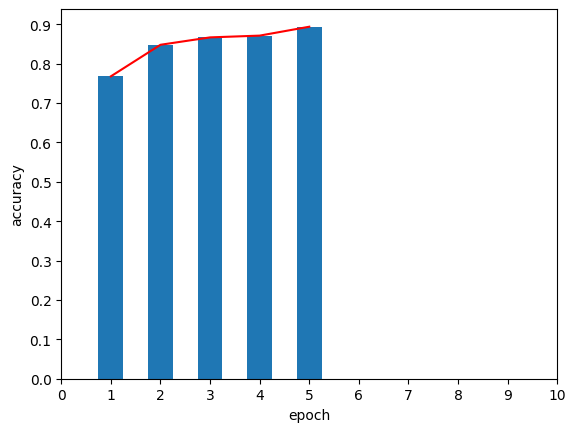

In [24]:
import matplotlib.pyplot as plt 

plt.plot([1, 2, 3, 4, 5], train_acc_log, c = 'red')
plt.bar([1, 2, 3, 4, 5], train_acc_log, width=0.5)
plt.yticks(np.arange(0, 1, 0.1))
plt.xticks(np.arange(0, 11, 1))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

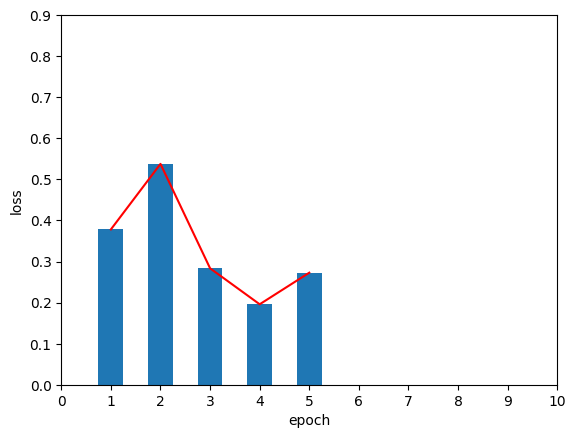

In [25]:
plt.plot([1, 2, 3, 4, 5], train_loss_log, c = 'red')
plt.bar([1, 2, 3, 4, 5], train_loss_log, width=0.5)
plt.yticks(np.arange(0, 1, 0.1))
plt.xticks(np.arange(0, 11, 1))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [26]:
model.eval()
final_result=[]
with torch.no_grad():
    for x in tqdm(test_dataloader):
        x = x.cuda()
        pred = model(x)
        
        final_result.append((torch.argmax(pred, dim=1)).item())

100%|██████████| 2947/2947 [00:09<00:00, 319.49it/s]


In [27]:
submission_sample['label'] = final_result

In [28]:
submission_sample['label'] = submission_sample['label']+1

In [29]:
submission_sample
np.unique(submission_sample['label'])

array([1, 2, 3, 4, 5, 6])

In [30]:
submission_sample.to_csv("tp1_submission.csv", index=False)